### Load Packages

In [ ]:
rm(list = ls()) # clear environment
knitr::opts_chunk$set(echo = TRUE)
install.packages("remotes")
remotes::install_github("MacoskoLab/liger", dependencies = T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




bit          (NA    -> 4.0.4     ) [CRAN]
plogr        (NA    -> 0.2.0     ) [CRAN]
bit64        (NA    -> 4.0.5     ) [CRAN]
BiocGenerics (NA    -> 0.36.0    ) [CRAN]
formatR      (NA    -> 1.7       ) [CRAN]
futile.op... (NA    -> 1.0.1     ) [CRAN]
lambda.r     (NA    -> 1.2.4     ) [CRAN]
snow         (NA    -> 0.4-3     ) [CRAN]
futile.lo... (NA    -> 1.4.3     ) [CRAN]
S4Vectors    (NA    -> 0.28.0    ) [CRAN]
RSQLite      (NA    -> 2.2.1     ) [CRAN]
IRanges      (NA    -> 2.24.0    ) [CRAN]
Biobase      (NA    -> 2.50.0    ) [CRAN]
zlibbioc     (NA    -> 1.36.0    ) [CRAN]
bitops       (NA    -> 1.0-6     ) [CRAN]
GenomeInf... (NA    -> 1.2.4     ) [CRAN]
RCurl        (NA    -> 1.98-1.2  ) [CRAN]
rstudioapi   (0.11  -> 0.13      ) [CRAN]
RcppEigen    (NA    -> 0.3.3.7.0 ) [CRAN]
sitmo        (NA    -> 2.0.1     ) [CRAN]
dqrng        (NA    -> 0.2.1     ) [CRAN]
RcppProgress (NA    -> 0.4.2     ) [CRAN]
irlba        (NA    -> 2.3.3     ) [CRAN]
RcppAnnoy    (NA    -> 0.0.16    )

Installing 104 packages: bit, plogr, bit64, BiocGenerics, formatR, futile.options, lambda.r, snow, futile.logger, S4Vectors, RSQLite, IRanges, Biobase, zlibbioc, bitops, GenomeInfoDbData, RCurl, rstudioapi, RcppEigen, sitmo, dqrng, RcppProgress, irlba, RcppAnnoy, RSpectra, FNN, goftest, polyclip, tensor, abind, deldir, spatstat.utils, spatstat.data, fastmap, sourcetools, xtable, httpuv, waldo, colorspace, plyr, parallelly, listenv, globals, RcppArmadillo, matrixStats, gridExtra, reshape2, future, future.apply, caTools, gtools, gplots, rappdirs, cpp11, data.table, hexbin, shiny, zoo, igraph, reticulate, tmvnsim, iterators, checkmate, jpeg, png, fastmatch, BiocParallel, AnnotationDbi, XVector, GenomeInfoDb, uwot, spatstat, sctransform, Rtsne, rsvd, ROCR, RANN, plotly, pbapply, patchwork, miniUI, lmtest, leiden, ica, ggridges, ggrepel, fitdistrplus, cowplot, mnormt, foreach, viridis, htmlTable, latticeExtra, Formula, fgsea, reactome.db, org.Hs.eg.db, GenomicRanges, Seurat, psych, mclust, 

✔  checking for file ‘/tmp/RtmpeCyg5Q/remotes39552b1dde/MacoskoLab-liger-ee43c59/DESCRIPTION’
─  preparing ‘liger’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  installing the package to process help pages
─  saving partial Rd database (1m 6.6s)
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘liger_0.5.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(liger)
library(Matrix)
install.packages("patchwork")
library(patchwork)
install.packages("data.table")
library(data.table)

ERROR: ignored

### Load & Process Data

In [ ]:
# load data: PBMC - Peripheral Blood Mononuclear Cell, both control and stimulated set
ctrl_dge <- read.csv('https://sixtusdakurah.com/projects/liger/ctrl_sparse_dfp.csv', sep = ",", stringsAsFactors = FALSE)
stim_dge <- read.csv('https://sixtusdakurah.com/projects/liger/stim_sparse_dfp.csv', sep = ",", stringsAsFactors = FALSE)

In [ ]:
saveRDS(ctrl_dge, file = "ctrl_dge.rds")
saveRDS(stim_dge, file = "stim_dge.rds")

In [ ]:
ctrl_dge_1 <- read.csv('https://sixtusdakurah.com/projects/liger/ctrl_dense_shortAll2.csv', sep = ",", stringsAsFactors = FALSE)
stim_dge_1 <- read.csv('https://sixtusdakurah.com/projects/liger/stim_dense_shortAll2.csv', sep = ",", stringsAsFactors = FALSE)

In [ ]:
saveRDS(ctrl_dge_1, file = "ctrl_dge_1.rds")
saveRDS(stim_dge_1, file = "stim_dge_1.rds")

In [ ]:
ctrl_dge_ = ctrl_dge_1
stim_dge_ = stim_dge_1
# convert negative occurences to 0
ctrl_dge_[ctrl_dge_ < 0] = 0
stim_dge_[stim_dge_ < 0] = 0
# ctrl_dge_[sapply(ctrl_dge_, is.double)] <- ctrl_dge_[sapply(ctrl_dge_, is.double)] + 0.5
# stim_dge_[sapply(stim_dge_, is.double)] <- stim_dge_[sapply(stim_dge_, is.double)] + 0.5
# ctrl_dge_[sapply(ctrl_dge_, is.double)] <-lapply(ctrl_dge_[sapply(ctrl_dge_, is.double)], as.integer)
# stim_dge_[sapply(stim_dge_, is.double)] <-lapply(stim_dge_[sapply(stim_dge_, is.double)], as.integer)
head(ctrl_dge_)
head(stim_dge_)
head(ctrl_dge)
head(stim_dge)

,Gene,X0,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X2990,X2991,X2992,X2993,X2994,X2995,X2996,X2997,X2998,X2999
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10149,0.0000000,0.0000000,0.06339017,0.17123607,0.0000000,0.01561043,0.00000000,0.00000000,0.006768197,⋯,0.0000000,0.3552838,0.09009376,0.09013131,0.0000000,0.0373176,0.00000000,0.0000000,0.10127059,0.000000
2,10150,0.2210518,0.3183153,0.00000000,0.00000000,0.0000000,0.00000000,0.06341356,0.05416578,0.097016990,⋯,0.0000000,0.2280223,0.00000000,0.00000000,0.1155968,0.0000000,0.04404846,0.0000000,0.17942575,0.000000
3,6509,0.4950998,0.3552803,0.10178339,0.38472384,0.2452393,0.06777889,0.40629703,0.14044747,0.352214575,⋯,0.1387781,0.7292673,0.26165271,0.11120164,0.3976851,0.0000000,0.17627984,0.2355642,0.30887476,0.183897
4,4350,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,⋯,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.03027132,0.000000
5,7968,0.5286409,0.7302436,0.35690191,0.28449425,0.3726088,0.32165188,0.48085290,0.19376460,0.215210855,⋯,0.1812511,0.6353741,0.59013504,0.33480102,0.4394701,0.2310322,0.18580681,0.4273478,0.59654033,0.290461
6,6260,0.0000000,0.2954790,0.00000000,0.05999336,0.2576864,0.05327654,0.25531814,0.21559995,0.141236961,⋯,0.0000000,0.7918941,0.10570261,0.21616071,0.2073172,0.3017486,0.00000000,0.0000000,0.53012794,0.000000


,Gene,X0,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X2990,X2991,X2992,X2993,X2994,X2995,X2996,X2997,X2998,X2999
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,594,0.12995923,0.14855072,0.13705519,0.00000000,0.12666899,0.00000000,0.06785566,0.08302846,0.13937750,⋯,0.00000000,0.001048081,0.1661668,0.1819986,0.06434667,0.06924862,0.09796636,0.02981491,0.1646614,0.075216815
2,9998,0.10867933,0.17852980,0.20495456,0.04905067,0.06730925,0.01710579,0.11570853,0.11430789,0.13623376,⋯,0.00000000,0.000000000,0.2010455,0.1462081,0.09312592,0.11625872,0.10678125,0.07686890,0.1581087,0.009859033
3,9999,0.09537667,0.12524992,0.14955243,0.07465389,0.09819025,0.06624760,0.10601009,0.10602980,0.15401351,⋯,0.01147053,0.000000000,0.1408078,0.1536494,0.06025287,0.09253258,0.09261810,0.07768797,0.1097007,0.019995399
4,6366,0.13157612,0.18774478,0.23197562,0.07429399,0.11421619,0.08235868,0.13339083,0.17614633,0.20094861,⋯,0.03134999,0.054324288,0.2169099,0.1981037,0.14676714,0.13862060,0.18346953,0.19666868,0.1901293,0.121615127
5,7804,0.11629716,0.08298712,0.10322071,0.02854927,0.05866754,0.00000000,0.05092764,0.13477018,0.10458814,⋯,0.00000000,0.000000000,0.1154864,0.1040713,0.04475437,0.04667094,0.14926541,0.07025347,0.1081392,0.071972579
6,6127,0.10562377,0.12715350,0.09763225,0.01957656,0.06391047,0.00000000,0.06501222,0.02310970,0.02737585,⋯,0.00000000,0.000000000,0.1173026,0.1089822,0.07571422,0.08200955,0.02581973,0.02010439,0.1254716,0.000000000


,X,ctrlTCAGCGCTGGTCAT.1,ctrlTTATGGCTTCATTC.1,ctrlACCCACTGCTTAGG.1,ctrlATGGGTACCCCGTT.1,ctrlTGACTGGACAGTCA.1,ctrlGTGTAGTGGTTGTG.1,ctrlTGCGAAACGCATCA.1,ctrlTTCAACACTGAGGG.1,ctrlATTACCACGAATGA.1,⋯,ctrlGGCTACCTGCAGAG.1,ctrlGATATAACGAATAG.1,ctrlACAAATTGACCTGA.1,ctrlGAGATCACTGCCTC.1,ctrlGCCATGCTATGCCA.1,ctrlCAAGTTCTACGACT.1,ctrlACAGTGACCTTCGC.1,ctrlAATCTCACGTATCG.1,ctrlAGGTGGGACTCGCT.1,ctrlCCAACCTGGTATGC.1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,MIR1302.10,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,FAM138A,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,RP11.34P13.7,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,RP11.34P13.8,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,AL627309.1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,X,stimAGGACACTCATGGT.1,stimCCCTTACTTTGCGA.1,stimGCTACCTGTGGTCA.1,stimTCCTAATGTCTCTA.1,stimTAGCCCTGACCTCC.1,stimGGTCTAGAAGTGTC.1,stimTGACGAACTACGCA.1,stimTCATTCGATTTACC.1,stimAGGTACTGTTCCAT.1,⋯,stimCCGCTATGGTCCTC.1,stimATCTTGACGCTGAT.1,stimCGGTCACTAGCACT.1,stimAATCTCTGGTATGC.1,stimCGGTACCTAGATGA.1,stimTTGGTACTTTCCCG.1,stimGGAGGCCTTTTACC.1,stimTGCAGATGACCGAT.1,stimACTCCTCTACGGAG.1,stimGCATTGGATATGCG.1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,MIR1302.10,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,FAM138A,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,RP11.34P13.7,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,RP11.34P13.8,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,AL627309.1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
length(ctrl_dge[ctrl_dge==0])

[1] 105107617

In [ ]:
dim(ctrl_dge_)
dim(stim_dge_)
dim(ctrl_dge)
dim(stim_dge)

[1] 14879  3001

[1] 14578  3001

[1] 14879  3001

[1] 14578  3001

In [ ]:
sub.set = 3000
ctrl_dge1 <- ctrl_dge#[1:sub.set, ]#1:(sub.set+1)]
stim_dge1 <- stim_dge#[1:sub.set, ]#1:(sub.set+1)]
ctrl_dge2 <- ctrl_dge1[, -1]
rownames(ctrl_dge2) <-  ctrl_dge1$X #colnames(ctrl_dge1[, -1])
stim_dge2 <- stim_dge1[, -1]
rownames(stim_dge2) <- stim_dge1$X #colnames(stim_dge1[, -1])
head(ctrl_dge2)
head(stim_dge2)


ctrl_dge1_ <- ctrl_dge_[, -1]
colnames(ctrl_dge1_) <- colnames(ctrl_dge1)[-1]
rownames(ctrl_dge1_) <- ctrl_dge1$X

stim_dge1_ <- stim_dge_[, -1]
colnames(stim_dge1_) <- colnames(stim_dge1)[-1]
rownames(stim_dge1_) <- stim_dge1$X
head(ctrl_dge1_)
head(stim_dge1_)

,ctrlTCAGCGCTGGTCAT.1,ctrlTTATGGCTTCATTC.1,ctrlACCCACTGCTTAGG.1,ctrlATGGGTACCCCGTT.1,ctrlTGACTGGACAGTCA.1,ctrlGTGTAGTGGTTGTG.1,ctrlTGCGAAACGCATCA.1,ctrlTTCAACACTGAGGG.1,ctrlATTACCACGAATGA.1,ctrlACGCCACTTCTTTG.1,⋯,ctrlGGCTACCTGCAGAG.1,ctrlGATATAACGAATAG.1,ctrlACAAATTGACCTGA.1,ctrlGAGATCACTGCCTC.1,ctrlGCCATGCTATGCCA.1,ctrlCAAGTTCTACGACT.1,ctrlACAGTGACCTTCGC.1,ctrlAATCTCACGTATCG.1,ctrlAGGTGGGACTCGCT.1,ctrlCCAACCTGGTATGC.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
RP11.206L10.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP11.206L10.9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NOC2L,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,stimAGGACACTCATGGT.1,stimCCCTTACTTTGCGA.1,stimGCTACCTGTGGTCA.1,stimTCCTAATGTCTCTA.1,stimTAGCCCTGACCTCC.1,stimGGTCTAGAAGTGTC.1,stimTGACGAACTACGCA.1,stimTCATTCGATTTACC.1,stimAGGTACTGTTCCAT.1,stimTATGTCTGCACACA.1,⋯,stimCCGCTATGGTCCTC.1,stimATCTTGACGCTGAT.1,stimCGGTCACTAGCACT.1,stimAATCTCTGGTATGC.1,stimCGGTACCTAGATGA.1,stimTTGGTACTTTCCCG.1,stimGGAGGCCTTTTACC.1,stimTGCAGATGACCGAT.1,stimACTCCTCTACGGAG.1,stimGCATTGGATATGCG.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AL627309.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP11.206L10.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP11.206L10.9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NOC2L,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,ctrlTCAGCGCTGGTCAT.1,ctrlTTATGGCTTCATTC.1,ctrlACCCACTGCTTAGG.1,ctrlATGGGTACCCCGTT.1,ctrlTGACTGGACAGTCA.1,ctrlGTGTAGTGGTTGTG.1,ctrlTGCGAAACGCATCA.1,ctrlTTCAACACTGAGGG.1,ctrlATTACCACGAATGA.1,ctrlACGCCACTTCTTTG.1,⋯,ctrlGGCTACCTGCAGAG.1,ctrlGATATAACGAATAG.1,ctrlACAAATTGACCTGA.1,ctrlGAGATCACTGCCTC.1,ctrlGCCATGCTATGCCA.1,ctrlCAAGTTCTACGACT.1,ctrlACAGTGACCTTCGC.1,ctrlAATCTCACGTATCG.1,ctrlAGGTGGGACTCGCT.1,ctrlCCAACCTGGTATGC.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RP11.206L10.2,0.0000000,0.0000000,0.06339017,0.17123607,0.0000000,0.01561043,0.00000000,0.00000000,0.006768197,0.00000000,⋯,0.0000000,0.3552838,0.09009376,0.09013131,0.0000000,0.0373176,0.00000000,0.0000000,0.10127059,0.000000
RP11.206L10.9,0.2210518,0.3183153,0.00000000,0.00000000,0.0000000,0.00000000,0.06341356,0.05416578,0.097016990,0.03872275,⋯,0.0000000,0.2280223,0.00000000,0.00000000,0.1155968,0.0000000,0.04404846,0.0000000,0.17942575,0.000000
LINC00115,0.4950998,0.3552803,0.10178339,0.38472384,0.2452393,0.06777889,0.40629703,0.14044747,0.352214575,0.26574999,⋯,0.1387781,0.7292673,0.26165271,0.11120164,0.3976851,0.0000000,0.17627984,0.2355642,0.30887476,0.183897
FAM41C,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,⋯,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,0.03027132,0.000000
NOC2L,0.5286409,0.7302436,0.35690191,0.28449425,0.3726088,0.32165188,0.48085290,0.19376460,0.215210855,0.50828677,⋯,0.1812511,0.6353741,0.59013504,0.33480102,0.4394701,0.2310322,0.18580681,0.4273478,0.59654033,0.290461
KLHL17,0.0000000,0.2954790,0.00000000,0.05999336,0.2576864,0.05327654,0.25531814,0.21559995,0.141236961,0.00000000,⋯,0.0000000,0.7918941,0.10570261,0.21616071,0.2073172,0.3017486,0.00000000,0.0000000,0.53012794,0.000000


,stimAGGACACTCATGGT.1,stimCCCTTACTTTGCGA.1,stimGCTACCTGTGGTCA.1,stimTCCTAATGTCTCTA.1,stimTAGCCCTGACCTCC.1,stimGGTCTAGAAGTGTC.1,stimTGACGAACTACGCA.1,stimTCATTCGATTTACC.1,stimAGGTACTGTTCCAT.1,stimTATGTCTGCACACA.1,⋯,stimCCGCTATGGTCCTC.1,stimATCTTGACGCTGAT.1,stimCGGTCACTAGCACT.1,stimAATCTCTGGTATGC.1,stimCGGTACCTAGATGA.1,stimTTGGTACTTTCCCG.1,stimGGAGGCCTTTTACC.1,stimTGCAGATGACCGAT.1,stimACTCCTCTACGGAG.1,stimGCATTGGATATGCG.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL627309.1,0.12995923,0.14855072,0.13705519,0.00000000,0.12666899,0.00000000,0.06785566,0.08302846,0.13937750,0.00000000,⋯,0.00000000,0.001048081,0.1661668,0.1819986,0.06434667,0.06924862,0.09796636,0.02981491,0.1646614,0.075216815
RP11.206L10.2,0.10867933,0.17852980,0.20495456,0.04905067,0.06730925,0.01710579,0.11570853,0.11430789,0.13623376,0.00000000,⋯,0.00000000,0.000000000,0.2010455,0.1462081,0.09312592,0.11625872,0.10678125,0.07686890,0.1581087,0.009859033
RP11.206L10.9,0.09537667,0.12524992,0.14955243,0.07465389,0.09819025,0.06624760,0.10601009,0.10602980,0.15401351,0.03337869,⋯,0.01147053,0.000000000,0.1408078,0.1536494,0.06025287,0.09253258,0.09261810,0.07768797,0.1097007,0.019995399
LINC00115,0.13157612,0.18774478,0.23197562,0.07429399,0.11421619,0.08235868,0.13339083,0.17614633,0.20094861,0.08034275,⋯,0.03134999,0.054324288,0.2169099,0.1981037,0.14676714,0.13862060,0.18346953,0.19666868,0.1901293,0.121615127
NOC2L,0.11629716,0.08298712,0.10322071,0.02854927,0.05866754,0.00000000,0.05092764,0.13477018,0.10458814,0.00000000,⋯,0.00000000,0.000000000,0.1154864,0.1040713,0.04475437,0.04667094,0.14926541,0.07025347,0.1081392,0.071972579
KLHL17,0.10562377,0.12715350,0.09763225,0.01957656,0.06391047,0.00000000,0.06501222,0.02310970,0.02737585,0.00000000,⋯,0.00000000,0.000000000,0.1173026,0.1089822,0.07571422,0.08200955,0.02581973,0.02010439,0.1254716,0.000000000


In [ ]:
sum(stim_dge1$`stimAAACATTGATCACG.1`)
sum(stim_dge1_$`stimAAACATTGATCACG.1`)

[1] 1298

[1] 2014.598

In [ ]:
dim(ctrl_dge2)
dim(stim_dge2)
ctrl_dge3 = (as.matrix(ctrl_dge2))
stim_dge3 = (as.matrix(stim_dge2))

dim(ctrl_dge1_)
dim(stim_dge1_)
ctrl_dge2_ = (as.matrix(ctrl_dge1_))
stim_dge2_ = (as.matrix(stim_dge1_))

[1] 14879  3000

[1] 14578  3000

[1] 14879  3000

[1] 14578  3000

### Create Liger Object and Select Genes

In [ ]:
ifnb_liger <- createLiger(list(ctrl = ctrl_dge3, stim = stim_dge3), take.gene.union = T)
ifnb_liger_ <- createLiger(list(ctrl = ctrl_dge2_, stim = stim_dge2_), take.gene.union = T)

ERROR: ignored

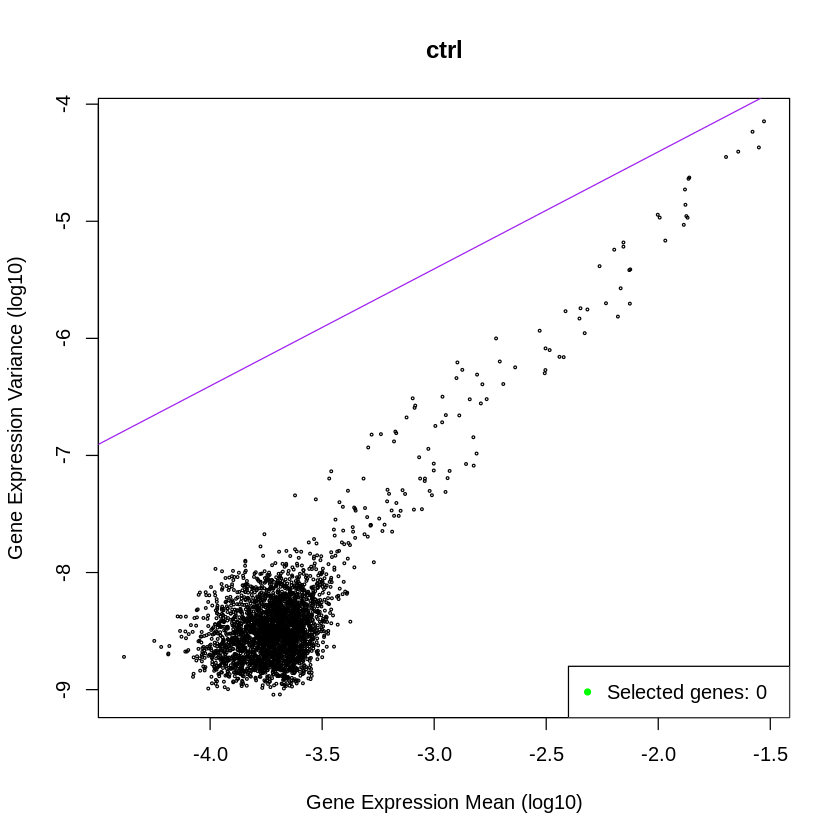

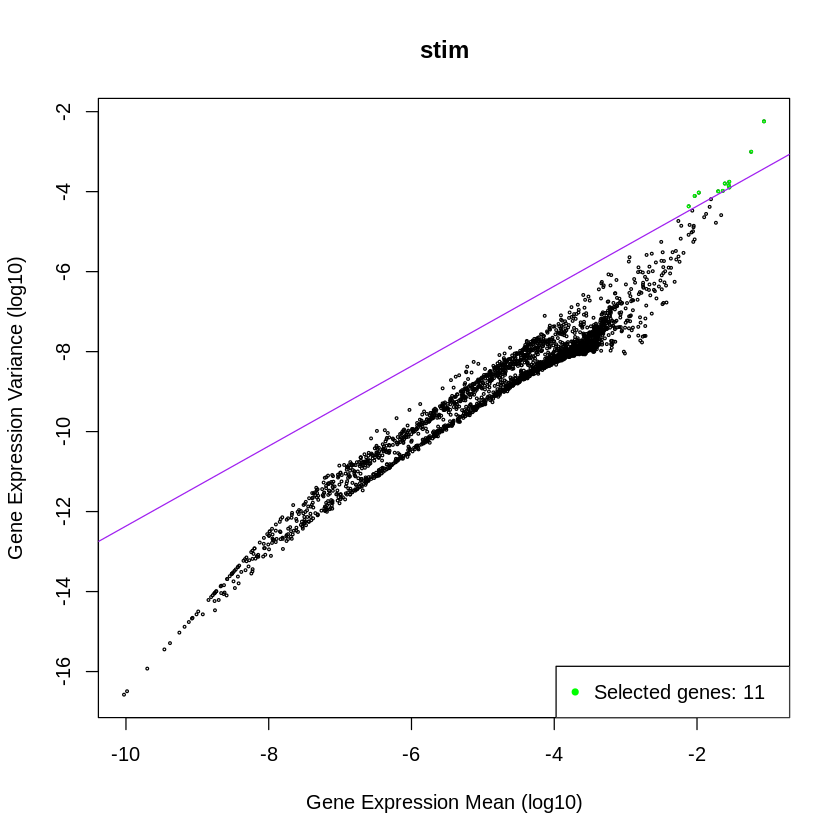

In [ ]:
# normalize and scale
ifnb_liger <- normalize(ifnb_liger)
ifnb_liger <- selectGenes(ifnb_liger, do.plot = F, var.thresh = 0.0)
ifnb_liger <- scaleNotCenter(ifnb_liger)

ifnb_liger_ <- normalize(ifnb_liger_)
ifnb_liger_ <- selectGenes(ifnb_liger_, do.plot = T, var.thresh = 0.0)
ifnb_liger_ <- scaleNotCenter(ifnb_liger_)

### Perform Matrix Factorization

In [ ]:
# joint factorization
ifnb_liger <- optimizeALS(ifnb_liger, k = 10)
ifnb_liger_ <- optimizeALS(ifnb_liger_, k = 10)

  |======================================================================| 100%
Finished in 30.09794 secs, 30 iterations.
Max iterations set: 30.
Final objective delta: 4.2801e-05.
Best results with seed 1.


ERROR: ignored

### Normalize and Align Data

In [ ]:
# quatile normalize
ifnb_liger <- quantile_norm(ifnb_liger)
ifnb_liger <- louvainCluster(ifnb_liger, resolution = 0.25)

ifnb_liger_ <- quantile_norm(ifnb_liger_)
ifnb_liger_ <- louvainCluster(ifnb_liger_, resolution = 0.25)

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”
Warning me

### Check Expressions Agreement

This measure how much the factorization and alignment distorts the geometry of the original datsets.

---


1.   Perform dimensionality reduction on the factorized datasets.
2.   Measure similarity (Jaccard index) between k-nn for each cell in original datasets, and the aligned datasets.
3. The final metric is obtained by averaging across all cells.

---

The greater the agreement, the less distortion in the geometry there is.

Usually,any agreement higher than 0.2 or 0.3 indicates very little or non-existent distortion in geometry.

In [ ]:
print(paste("Agreement for Original Expressions: ", round(calcAgreement(ifnb_liger, ndims = 40, k = 10)*100, 2), "%", sep=''))
print(paste("Agreement for NeuMF Expressions: ", round(calcAgreement(ifnb_liger_, ndims = 40, k = 10)*100, 2), "%", sep=''))

[1] "Reducing dimensionality using NMF"

Converged in 0.03524113 seconds, 61 iterations. Objective: 359862.9 

Converged in 0.03732324 seconds, 50 iterations. Objective: 349410.8 
[1] "Agreement for Original Expressions: 3.12%"
[1] "Reducing dimensionality using NMF"

Converged in 0.01627898 seconds, 500 iterations. Objective: 1.176398e-05 

Converged in 0.01624489 seconds, 500 iterations. Objective: 4.283736e-08 
[1] "Agreement for NeuMF Expressions: 22.36%"


There is no apparent distortion in the geometry of the expressions matrix obtained via NeuMF.

On the otherhand, the original expression matrix shows significant distortion in it's geometry after factorization.

### Visualize Alignments & Clusters

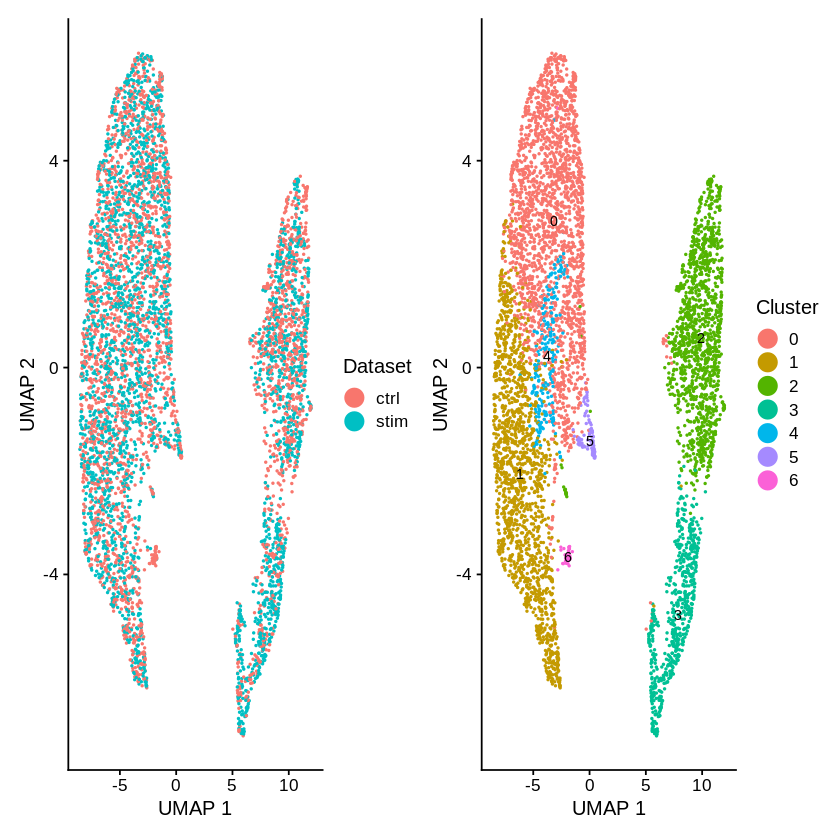

In [ ]:
# visualizations
ifnb_liger <- runUMAP(ifnb_liger, distance = 'cosine', n_neighbors = 20, min_dist = 0.3)
all.plots <- plotByDatasetAndCluster(ifnb_liger, axis.labels = c('UMAP 1', 'UMAP 2'), return.plots = T)
all.plots[[1]] + all.plots[[2]]

In [ ]:
# visualizations
ifnb_liger_ <- runUMAP(ifnb_liger_, distance = 'cosine', n_neighbors = 20, min_dist = 0.1)
all.plots <- plotByDatasetAndCluster(ifnb_liger_, axis.labels = c('UMAP 1', 'UMAP 2'), return.plots = T)
all.plots[[1]] + all.plots[[2]]

ERROR: ignored

### Compute Alignments

This quantifies how well-aligned the two datasets are.



1.   Downsample all datasets to have as many cells as the smallets one.
2.   Construct a nn graph and calculate for each cell how many of its neighbors are from the same dataset.

3. Average across all cells and normalize to be between 0 and 1.


This should be high when genes share common cell types.

(It turns out alignment can exceed 1. But I couldn't find a practical reason for such).

In [ ]:
print(paste("Alignment for Original Expressions: ", round(calcAlignment(ifnb_liger)*100, 2), "%", sep=''))
print(paste("Alignment for NeuMF Express0ins: ", round(calcAlignment(ifnb_liger_)*100, 2), "%", sep=''))

[1] "Alignment for Original Expressions: 95.92%"
[1] "Alignment for NeuMF Express0ins: 56.88%"


In [ ]:
print(paste("Alignment for Original Expressions: ", round(calcAlignmentPerCluster(ifnb_liger), 4), sep=''))
print(paste("Alignment for NeuMF Expressins: ", round(calcAlignmentPerCluster(ifnb_liger_), 4), sep=''))

[1] "Alignment for Original Expressions: 0.982" 
[2] "Alignment for Original Expressions: 1.0024"
[3] "Alignment for Original Expressions: 0.8533"
[4] "Alignment for Original Expressions: 0.9566"
[5] "Alignment for Original Expressions: 0.9477"
[6] "Alignment for Original Expressions: 1.03"  
[7] "Alignment for Original Expressions: 1.2"   
[1] "Alignment for NeuMF Expressins: 0.5468"
[2] "Alignment for NeuMF Expressins: 0.531" 
[3] "Alignment for NeuMF Expressins: 0.3378"
[4] "Alignment for NeuMF Expressins: 0.2221"
[5] "Alignment for NeuMF Expressins: 0.3791"
[6] "Alignment for NeuMF Expressins: 0.3639"


In [ ]:
ligerE1 <- ctrl_dge
ligerE2 <- stim_dge

ctrl_dge1 <- ctrl_dge#[1:sub.set, ]#1:(sub.set+1)]
stim_dge1 <- stim_dge#[1:sub.set, ]#1:(sub.set+1)]
ctrl_dge2 <- ctrl_dge1#[, -1]
rownames(ctrl_dge2) <-  ctrl_dge1$X #colnames(ctrl_dge1[, -1])
stim_dge2 <- stim_dge1#[, -1]
rownames(stim_dge2) <- stim_dge1$X #colnames(stim_dge1[, -1])

ctrl_dge3 = (as.matrix(ctrl_dge2))
stim_dge3 = (as.matrix(stim_dge2))

# liger_ <- createLiger(list("ctrl"= ligerE1, "stim" = ligerE2))
# liger_ <- normalize(liger_)
# liger_ <- quantile_norm(liger_)
# calcAlignment(liger_)

In [ ]:
liger_ <- createLiger(list("ctrl"= ctrl_dge3, "stim" = stim_dge3))

Warning message in storage.mode(from) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(from) <- "double":
“NAs introduced by coercion”


ERROR: ignored